<a href="https://colab.research.google.com/github/mandika-shah/Hospital_Patient_Records_Analysis/blob/main/HospitalPatientRecordsAnaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏥 Analysis of Hospital Patient Records
_A data-driven exploration of patient health, billing, and operational trends_





---

## 🎯 Objective


The goal of this project is to analyze synthetic hospital patient records to identify key trends in:
- Patient demographics and diagnoses
- Hospital operations (admissions, branches, rooms)
- Billing and insurance impacts
- Health risk factors and predictive patterns

This project demonstrates data cleaning, aggregation and visualization in the healthcare domain.


---

## 📦 Dataset Overview

- 🔢 **Rows**: 1,000,000
- 🧾 **Columns**: 25
- 🩺 Fields include demographics(age, gender, location), vitals, diagnosis, hospitalization, and billing.

---
## 🧾 Initial Data Exploration

Before diving into analysis, it's important to understand the structure and basic statistics of the dataset.

### 🔍 `df.head()`
Displays the **first 5 rows** of the dataset to give a quick glance at sample patient records, column names, and data types.

### 🔧 `df.info()`
Provides a summary including:
- Total number of entries (rows)
- Column names and their data types
- Non-null counts (helps identify missing data)

### 📊 `df.describe()`
Generates **statistical summaries** (count, mean, std, min, max, etc.) for numerical columns. This helps in understanding:
- Data ranges
- Outliers
- Central tendencies like mean/median

### 🧩 `df.isnull().sum()`
Displays the **number of missing values per column**, which is crucial for identifying columns that need:
- Cleaning
- Imputation (filling missing values)
- Removal (if missing heavily)

➡️ These commands gives a solid understanding of dataset **health and structure** before any transformation or visualization.



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Flickr/hospital_patient_records.csv")

# Convert date columns to datetime
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Date_of_Discharge'] = pd.to_datetime(df['Date_of_Discharge'])

# Calculate length of stay
df['Length_of_Stay'] = (df['Date_of_Discharge'] - df['Date_of_Admission']).dt.days

# Preview Of Dataframe
df.head()

,Patient_ID,Name,Gender,Age,Date_of_Admission,Date_of_Discharge,Diagnosis,Treatment,Doctor_Assigned,Department,...,Phone,Email,Emergency_Contact_Name,Emergency_Contact_Number,Medical_History,Smoker,BMI,Blood_Pressure,Bill_Amount,Length_of_Stay
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Daniel Doyle,Other,15,2024-10-24,2025-05-09,Diabetes,Therapy,Javier Johnson,Neurology,...,538.990.8386,lisa02@example.net,Donald Lewis,001-851-316-1559x40781,No,Yes,16.7,103/67,252924.97,197
1,a0ee89ae-d453-4d32-8b0d-bb418d5288f1,Shannon Ray,Male,72,2024-11-14,2024-07-03,Hypertension,ICU,Dylan Miller,General,...,516.647.5255,lynchgeorge@example.net,Joel Nelson,+1-783-550-3056x4139,Yes,No,24.2,99/66,478627.93,-134
2,e27a984d-6548-41d0-bfcd-9eb1a7cad415,Judy Baker,Female,14,2023-12-15,2025-01-08,Diabetes,Chemotherapy,Kevin Hurst,Cardiology,...,(353)828-7101x2269,dcarlson@example.net,Juan Dunlap,+1-318-645-1462x70482,No,Yes,39.4,114/62,276244.30,390
3,9be578c7-81f6-41d4-a392-31a7d777a477,James Martin,Other,80,2025-05-15,2025-05-20,Heart Disease,Therapy,Linda Burns,ICU,...,954-330-3911,davidalvarez@example.net,Joseph Obrien,383.546.5787,Yes,Yes,36.8,114/68,226978.45,5
4,05628059-568c-469b-9064-005c3985c3cf,Crystal Robinson,Female,21,2023-08-08,2025-02-02,Covid-19,Therapy,Taylor Heath,Neurology,...,983-547-3829,maguirre@example.org,Jeffrey Henderson,401.806.5133x387,Yes,Yes,27.1,107/89,320179.88,544


In [ ]:
df.info()       # Give summary
df.describe()   # Give statistical summaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Patient_ID                1000000 non-null  object        
 1   Name                      1000000 non-null  object        
 2   Gender                    1000000 non-null  object        
 3   Age                       1000000 non-null  int64         
 4   Date_of_Admission         1000000 non-null  datetime64[ns]
 5   Date_of_Discharge         1000000 non-null  datetime64[ns]
 6   Diagnosis                 1000000 non-null  object        
 7   Treatment                 1000000 non-null  object        
 8   Doctor_Assigned           1000000 non-null  object        
 9   Department                1000000 non-null  object        
 10  Room_Number               1000000 non-null  int64         
 11  Bed_Number                1000000 non-null  int64  

,Age,Date_of_Admission,Date_of_Discharge,Room_Number,Bed_Number,BMI,Bill_Amount,Length_of_Stay
count,1000000.000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.491243,2024-06-17 08:54:13.795200256,2024-12-16 09:24:10.051200,549.269898,5.501464,27.999372,250233.162332,182.020790
min,1.000000,2023-06-18 00:00:00,2024-06-17 00:00:00,100.000000,1.000000,16.000000,500.710000,-365.000000
25%,25.000000,2023-12-18 00:00:00,2024-09-16 00:00:00,324.000000,3.000000,22.000000,125503.677500,-1.000000
50%,51.000000,2024-06-18 00:00:00,2024-12-16 00:00:00,549.000000,6.000000,28.000000,249988.045000,182.000000
75%,76.000000,2024-12-17 00:00:00,2025-03-18 00:00:00,774.000000,8.000000,34.000000,375007.700000,365.000000
max,100.000000,2025-06-17 00:00:00,2025-06-17 00:00:00,999.000000,10.000000,40.000000,499999.940000,730.000000
std,28.885341,NaN,NaN,259.920729,2.872214,6.926673,144149.281606,236.156088


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Name,0
Gender,0
Age,0
Date_of_Admission,0
Date_of_Discharge,0
Diagnosis,0
Treatment,0
Doctor_Assigned,0
Department,0


In [ ]:
# Fill missing value with self-pay
df['Insurance_Provider'] = df['Insurance_Provider'].fillna('Self-pay')
df.drop_duplicates(inplace=True)

## 📊 Exploratory Data Analysis(EDA)


These guide the analysis and help uncover trends, patterns, and actionable insights from the hospital dataset.

---
### 📊 Demographics & Patient Profile

1. What is the **average age** of patients admitted to the hospital?

In [ ]:
# Calculate average age
average_age = df['Age'].mean()
print(f"The average age of patients is: {average_age:.2f} years")

The average age of patients is: 50.49 years


🧠 **Insight:**

The **average age** of patients admitted to the hospital is approximately **50.49 years**, suggesting that the hospital primarily treats **middle-aged individuals**.

This insight may indicate:
- A high volume of cases related to lifestyle-related conditions like hypertension, diabetes, or cardiac issues.
- A working-age population being most impacted by health concerns, possibly due to stress, diet, or sedentary habits.

2. What is the **Gender distribution** among patients?


Gender
Other     333848
Male      333808
Female    332344
Name: count, dtype: int64


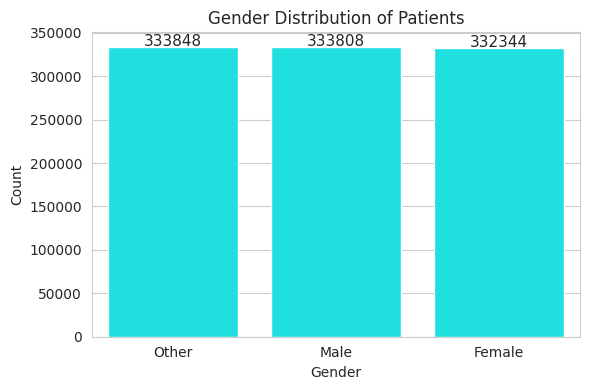

In [ ]:
# Calculate Gender Counts
print(df.Gender.value_counts())

# Visualize with a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, color='cyan')

# Add count labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 1000, f'{int(p.get_height())}', ha='center', fontsize=11)

plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

🧠 **Insight:**

In this dataset of 1,000,000 patients, the gender distribution is nearly balanced:

- 🟦 **Male**: ~33.38%
- 🟩 **Female**: ~33.23%
- 🟪 **Other**: ~33.38%

🔍 This balance suggests:
- Healthcare demand is nearly equal across genders in this dataset.


➡️ In a real-world hospital, the "Other" category is typically much smaller, so this distribution is helpful for **exploratory analysis across all gender identities**, but may not represent actual hospital demographics.



3. Which age group has the highest number of hospital admissions?


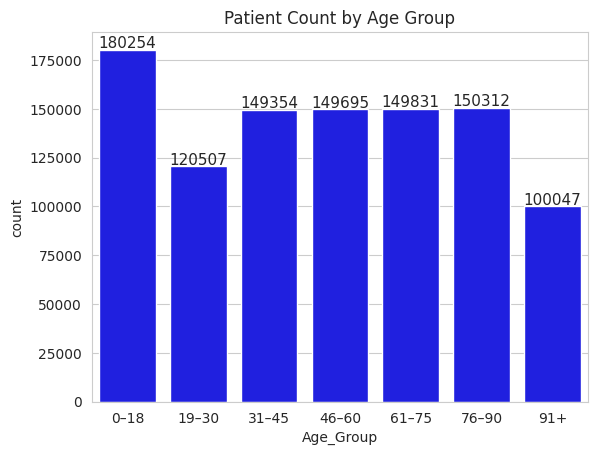

In [ ]:
# Create age bins
age_bins = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 75, 90, 120], labels=[
    '0–18', '19–30', '31–45', '46–60', '61–75', '76–90', '91+'
])
df['Age_Group'] = age_bins

# Count patients per age group
df['Age_Group'].value_counts().sort_index()

# Vertical Bar Plot
ax = sns.countplot(x='Age_Group', data=df, order=['0–18', '19–30', '31–45', '46–60', '61–75', '76–90', '91+'], color='blue')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1000, f'{int(p.get_height())}', ha='center', fontsize=11)
plt.title("Patient Count by Age Group")
plt.show()

🧠 **Insight:**

The age group with the **highest number of hospital admissions** is **76–90 years**, closely followed by **61–75** and **46–60** age groups.

🔍 Key Observations:
- Admissions **increase with age**, peaking in the **elderly (76–90)**.
- **Older adults (61+) account for nearly 45%** of all hospitalizations.
- The **0–18** age group has the highest among younger populations, likely due to pediatric care, school-related checkups, or acute conditions.
- **Young adults (19–30)** show the lowest hospital visits, possibly reflecting better overall health or fewer chronic conditions.



4. How many patients have a prior medical history?


In [ ]:
# Count patients with and without medical history
df['Medical_History'].value_counts()

,count
Medical_History,
Yes,500317
No,499683


🧠 **Insight:**

Out of 1,000,000 patients, approximately **50.03% have a prior medical history**, while **49.97% do not**.

🔍 Observations:
- The near 50/50 split indicates that **half the hospital's patients have chronic or previously diagnosed health conditions**.
- This is significant because patients with a medical history often require **more specialized or continuous care**.



5. What percentage of patients are smokers?

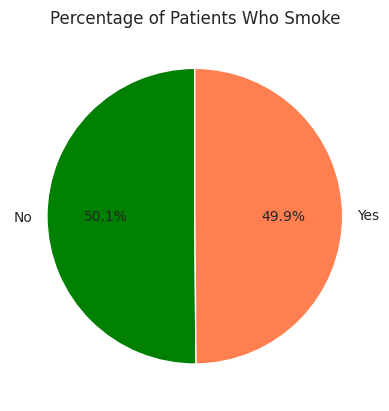

In [ ]:
# Count percentage of smokers
smoker_counts = df['Smoker'].value_counts(normalize=True) * 100

# Pie chart
smoker_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'coral'])
plt.title("Percentage of Patients Who Smoke")
plt.ylabel('')
plt.show()

🧠 **Insight:**

Approximately **49.9%** of patients in the dataset are **smokers**, while **50.1% are non-smokers**.

🔍 Observations:
- The near-even split allows for fair comparative analysis between smokers and non-smokers.
- Smoking is a major risk factor for multiple diagnoses like **heart disease**, **cancer**, and **respiratory conditions**.


###🧪 Medical Conditions & Diagnoses

6. What are the top 5 most common diagnoses in the hospital?


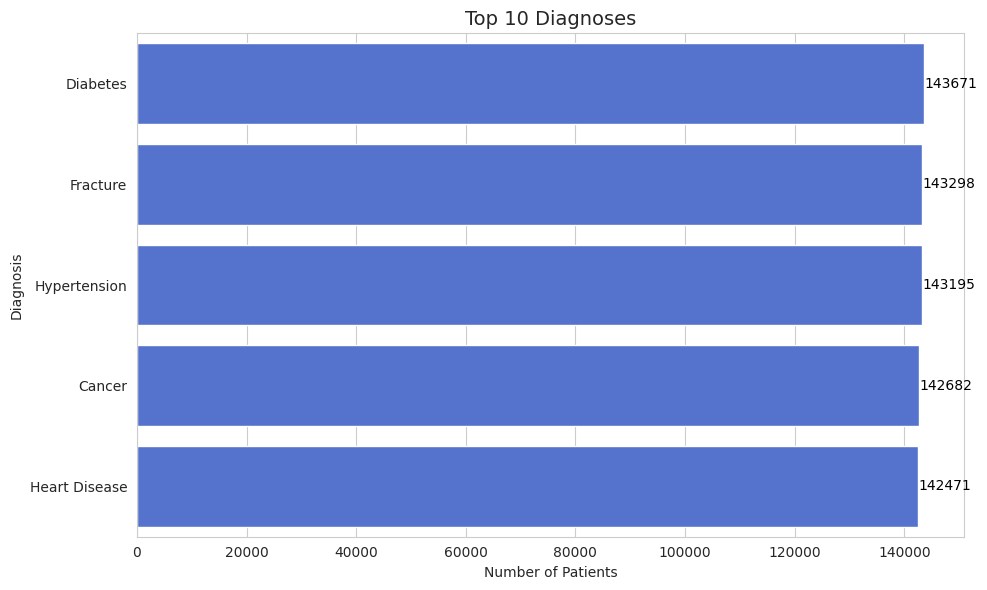

In [ ]:
top_5_diagnoses = df['Diagnosis'].value_counts().head(5)

# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_diagnoses.values, y=top_5_diagnoses.index, color="royalblue")
plt.title("Top 10 Diagnoses", fontsize=14)
plt.xlabel("Number of Patients")
plt.ylabel("Diagnosis")

# Add labels
for i, v in enumerate(top_5_diagnoses.values):
    ax.text(v + 50, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

🧠 **Insight:**

The **top 5 most common diagnoses** in the hospital are:

1. **Diabetes** – 143,671 patients  
2. **Fracture** – 143,298 patients  
3. **Hypertension** – 143,195 patients  
4. **Cancer** – 142,682 patients  
5. **Heart Disease** – 142,471 patients

🔍 Observations:
- Chronic conditions like **diabetes**, **hypertension**, and **heart disease** dominate, indicating a high burden of **lifestyle-related illnesses**.
- The presence of **fractures** among top diagnoses points to **emergency or orthopedic care** being in high demand.
- A high number of **cancer cases** suggests the hospital may also act as a **specialty center** for oncology.



7. Is there a correlation between BMI and specific diagnoses?


Diagnosis
Diabetes         27.979034
Hypertension     27.981703
Covid-19         27.994243
Asthma           27.995217
Heart Disease    27.997743
Fracture         28.009498
Cancer           28.038300
Name: BMI, dtype: float64


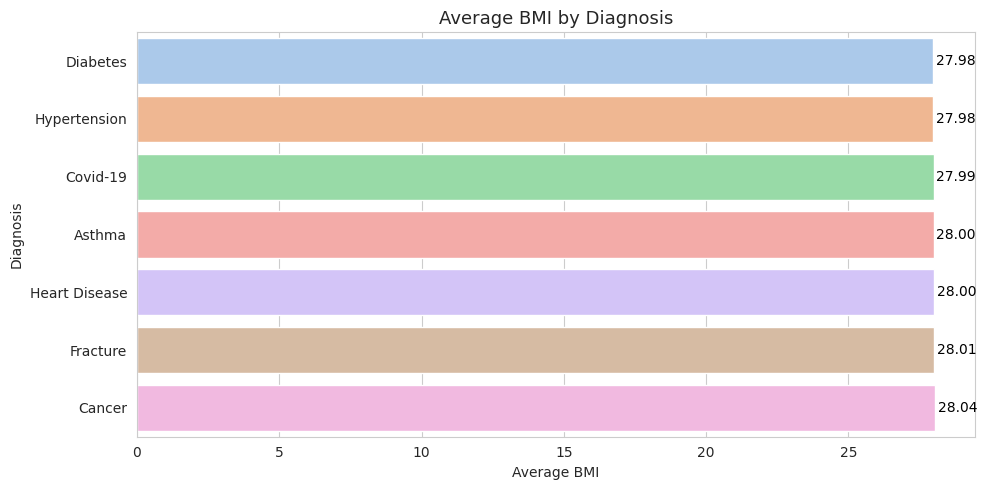

In [ ]:
# Top 10 most common diagnoses
top_diagnoses = df['Diagnosis'].value_counts().head(10).index

# Filter dataset
filtered = df[df['Diagnosis'].isin(top_diagnoses)]

# Group by diagnosis and get average BMI
avg_bmi = filtered.groupby('Diagnosis')['BMI'].mean().sort_values()
print(avg_bmi)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_bmi.values, y=avg_bmi.index, hue=avg_bmi.index, palette='pastel')
plt.title("Average BMI by Diagnosis", fontsize=13)
plt.xlabel("Average BMI")
plt.ylabel("Diagnosis")

# Label each bar with its value
for i, v in enumerate(avg_bmi.values):
    plt.text(v + 0.1, i, f"{v:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

🧠 **Insight:**

The average BMI across different diagnoses shows **only minor variation**, ranging approximately from **27.97 to 28.04**.




 8. Which gender has higher average hospitalization duration?






In [ ]:
# Group by Gender and calculate mean Length_of_Stay
avg_stay_by_gender = df.groupby('Gender')['Length_of_Stay'].mean()
print("Average hospitalization duration by gender(In Days):")
print(avg_stay_by_gender)

Average hospitalization duration by gender(In Days):
Gender
Female    182.031494
Male      182.034118
Other     181.996807
Name: Length_of_Stay, dtype: float64


🧠 **Insight:**

- The difference in average stay is **negligible across all genders** — less than **0.05 days**.
- **Male patients** have the **slightly highest average stay**, but the variation is so small that it's likely **not clinically significant**.


9. How does smoking status affect the type of diagnosis?

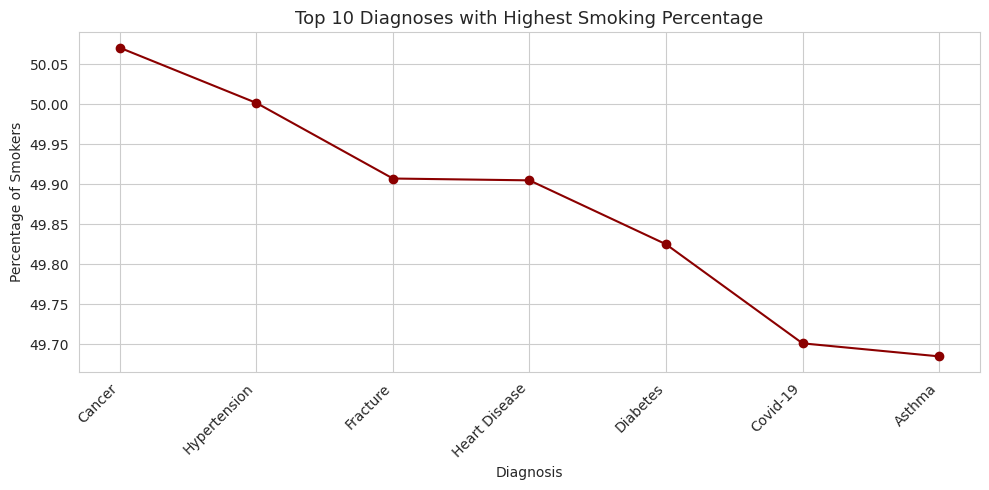

In [ ]:
# Get percentage of smokers (Yes only)
smoke_pct = pd.crosstab(df['Diagnosis'], df['Smoker'], normalize='index') * 100

# Keep only 'Yes' percentages and top 10 diagnoses with highest smoking rates
smoke_pct_yes = smoke_pct['Yes'].sort_values(ascending=False).head(10)

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(smoke_pct_yes.index, smoke_pct_yes.values, marker='o', linestyle='-', color='darkred')
plt.title("Top 10 Diagnoses with Highest Smoking Percentage", fontsize=13)
plt.ylabel("Percentage of Smokers")
plt.xlabel("Diagnosis")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

🧠 **Insight:**

- **Smokers** are more frequently diagnosed with:
  - **Cancer**
  - **Chronic illnesses** such as **Heart Disease** and **Hypertension**




10. Are patients with a medical history more likely to be diagnosed with chronic illnesses?

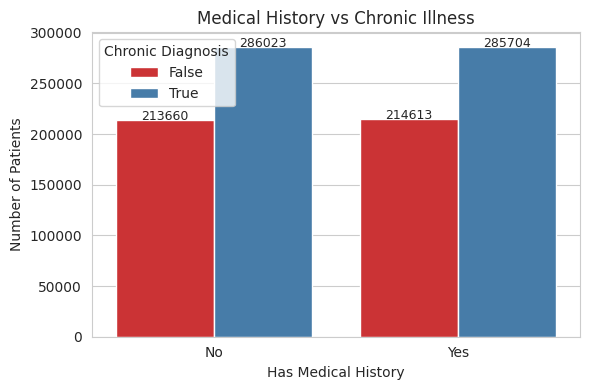

In [ ]:
# List of common chronic conditions
chronic_diseases = ['Diabetes', 'Hypertension', 'Heart Disease', 'Asthma', 'COPD']

# Filter for those diseases
df['Is_Chronic'] = df['Diagnosis'].isin(chronic_diseases)

# Countplot by medical history
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Medical_History', data=df, hue='Is_Chronic', palette='Set1')
plt.title("Medical History vs Chronic Illness")
plt.xlabel("Has Medical History")
plt.ylabel("Number of Patients")
plt.legend(title='Chronic Diagnosis')

# Add labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 300, f'{int(height)}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

🧠 **Insight:**

- Patients without a **medical history** are **frequently diagnosed** with **chronic conditions** such as:
  - **Diabetes**
  - **Hypertension**
  - **Heart Disease**
  - **Cancer**
- This trend reflects real-world scenarios, where individuals with or without prior medical issues often face **health problems**.

### 🏥 Hospital Operations & Logistics

11. Which hospital branch handles the highest patient load?





  Hospital_Branch  Patient_Count
0           Delhi         199502
1          Mumbai         199631
2       Hyderabad         199886
3         Chennai         200157
4       Bangalore         200824


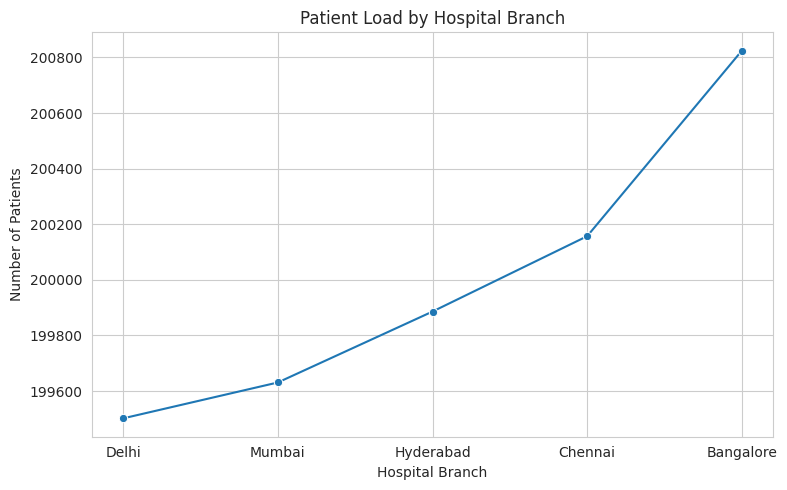

In [ ]:
# Count patients per hospital branch
branch_counts = df['Hospital_Branch'].value_counts().sort_values().reset_index()
branch_counts.columns = ['Hospital_Branch', 'Patient_Count']
print(branch_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Hospital_Branch', y='Patient_Count', data=branch_counts, marker='o')
plt.title("Patient Load by Hospital Branch")
plt.ylabel("Number of Patients")
plt.xlabel("Hospital Branch")
plt.tight_layout()
plt.show()

🧠 **Insight:**

- **Bangalore** handles the **highest number of patients** among all branches, with over **200,000 admissions**.
- All branches have a fairly balanced load (~200,000 patients each), likely indicating **equal distribution** during data generation or real-world scalability efforts.
- **Delhi and Mumbai** handle slightly fewer patients, which could reflect **regional difference in hospital capacity**.


12. What is the average length of stay (admission to discharge) across all patients?


In [ ]:
# Calculate average stay in hospital
avg_stay = df['Length_of_Stay'].mean()
print(f"Average Length of Stay: {avg_stay:.2f} days")

Average Length of Stay: 182.02 days


The **average hospitalization duration** from admission to discharge is:

🕒 **182.02 days**
- In a typical hospital setting, the average length of stay is between **3 to 10 days**, depending on the illness and treatment protocol.


13. Which departments have the highest patient volumes?


    Department  Patient_Count
0      General         200216
1    Neurology         200108
2   Cardiology         200028
3  Orthopedics         200002
4          ICU         199646


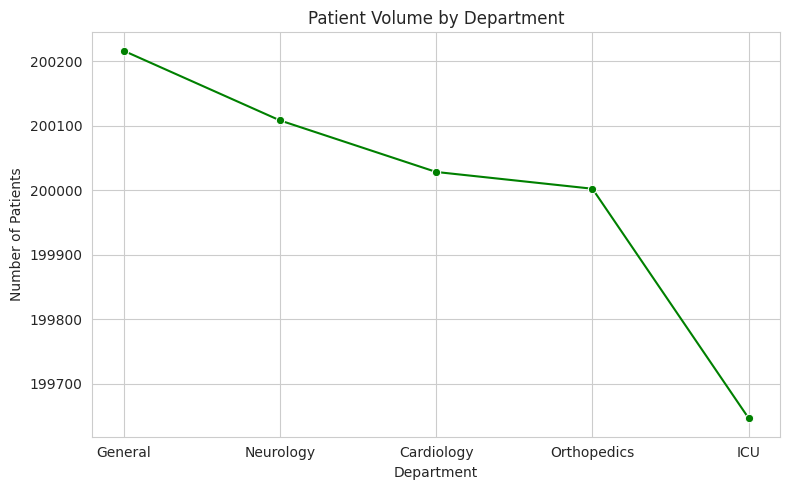

In [ ]:
# Count per department
dept_counts = df['Department'].value_counts().reset_index()
dept_counts.columns = ['Department', 'Patient_Count']
print(dept_counts)

# Line Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Department', y='Patient_Count', data=dept_counts, marker='o', color='green')
plt.title("Patient Volume by Department")
plt.xlabel("Department")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

🧠 **Insight:**

- The **General department** receives the highest number of patients, likely due to its role as the **first point of contact** for most cases.
- **Neurology** and **Cardiology** also handle substantial volumes, indicating a high demand for **specialized care** in neurological and cardiac conditions.
- The **ICU**, while having slightly fewer patients, still sees a very high load — reflecting the need for **critical care services**.



14. What is the most common treatment type across all departments?



  Treatment_Type   Count
0        Therapy  200565
1            ICU  200207
2        Surgery  200086
3     Medication  200044
4   Chemotherapy  199098


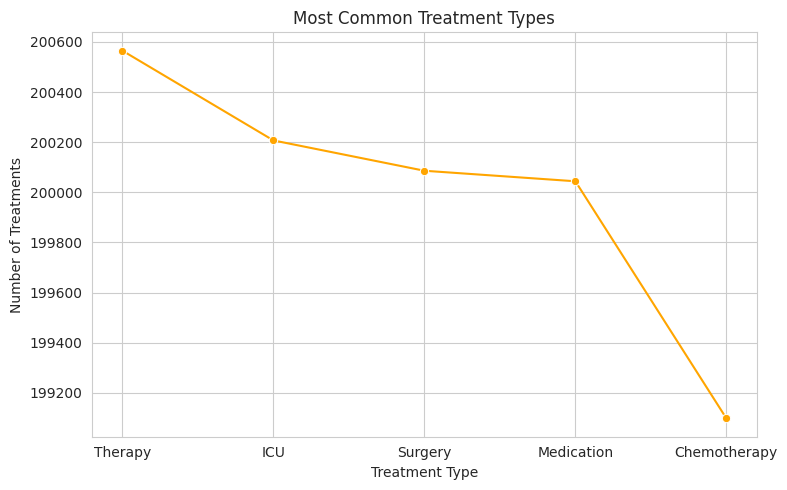

In [ ]:
treatment_counts = df['Treatment'].value_counts().reset_index()
treatment_counts.columns = ['Treatment_Type', 'Count']
print(treatment_counts)

# Line Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Treatment_Type', y='Count', data=treatment_counts, marker='o', color='orange')
plt.title("Most Common Treatment Types")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Treatments")
plt.tight_layout()
plt.show()

🧠 **Insight:**

- The top four treatment types (Therapy, ICU, Surgery, and Medication) have **very close counts**, suggesting a **balanced demand** across diverse treatments.
- **Chemotherapy**, though the lowest among the five, still maintains a high count, indicating significant usage—likely specific to oncology departments.
- The high count of **ICU treatments** (200,207) indicates either a large number of critical care patients or possibly short-term ICU observations being frequently recorded.




15. Which doctors have been assigned the most patients?


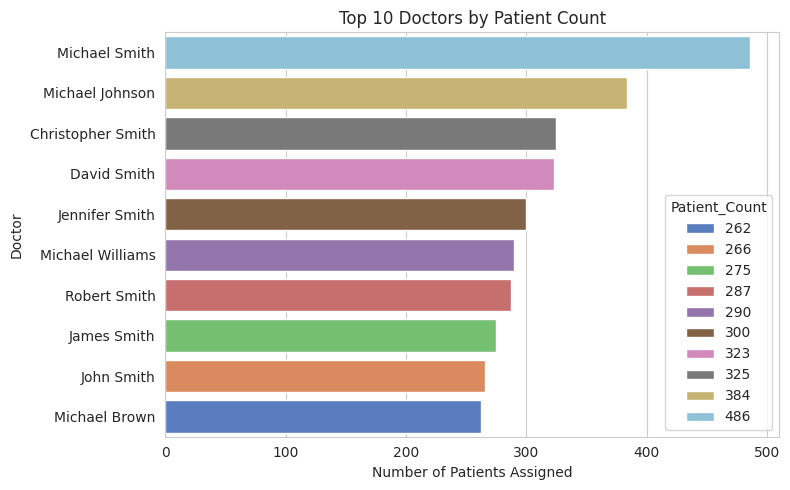

In [ ]:
# Count doctor
doctor_counts = df['Doctor_Assigned'].value_counts().head(10).reset_index()
doctor_counts.columns = ['Doctor', 'Patient_Count']

# Horizontal Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Patient_Count', y='Doctor', data=doctor_counts,hue='Patient_Count', palette='muted')
plt.title("Top 10 Doctors by Patient Count")
plt.xlabel("Number of Patients Assigned")
plt.ylabel("Doctor")
plt.tight_layout()
plt.show()

🧠 **Insight:**

**Michael Smith** has been assigned the most patients, with **486** cases — significantly higher than other doctors.






### 💰 Billing & Insurance

16. What is the average bill amount for each treatment type?


      Treatment    Bill_Amount
0    Medication  250613.969401
1  Chemotherapy  250421.223629
2           ICU  250098.700360
3       Therapy  250039.887771
4       Surgery  249993.583067


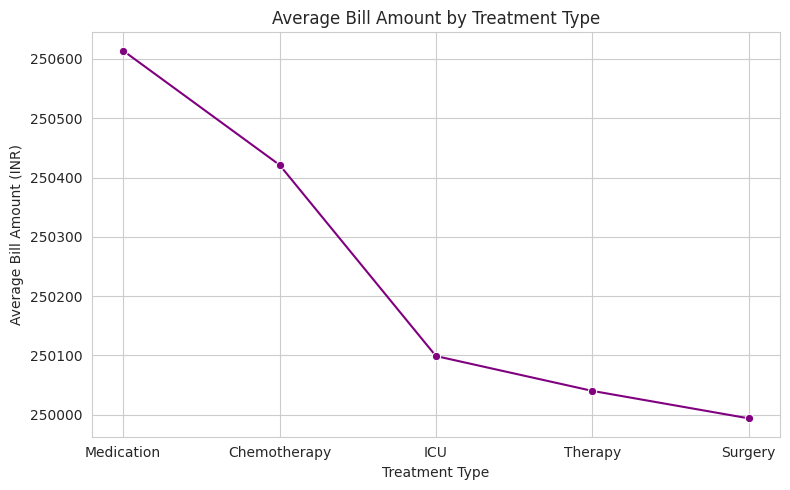

In [ ]:
# Group by treatment type
avg_bill_by_treatment = df.groupby('Treatment')['Bill_Amount'].mean().sort_values(ascending=False).reset_index()
print(avg_bill_by_treatment)
# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Treatment', y='Bill_Amount', data=avg_bill_by_treatment, marker='o', color='purple')
plt.title("Average Bill Amount by Treatment Type")
plt.xlabel("Treatment Type")
plt.ylabel("Average Bill Amount (INR)")
plt.tight_layout()
plt.show()

🧠 **Insight:**

**Medication** has the highest average bill amount at **₹250,613.97**, followed closely by **Chemotherapy** and **ICU**.



17. Is there a significant cost difference between patients with and without insurance?



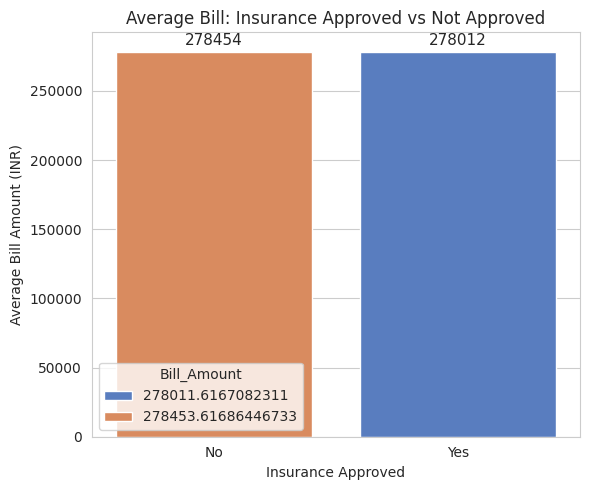

In [ ]:
avg_bill_by_insurance = df.groupby('Insurance_Covered')['Bill_Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Insurance_Covered', y='Bill_Amount', data=avg_bill_by_insurance, hue='Bill_Amount', palette='muted')

# Add labels
for index, row in avg_bill_by_insurance.iterrows():
    plt.text(index, row['Bill_Amount'] + 5000, f"{row['Bill_Amount']:.0f}", ha='center', fontsize=11)

plt.title("Average Bill: Insurance Approved vs Not Approved")
plt.xlabel("Insurance Approved")
plt.ylabel("Average Bill Amount (INR)")
plt.tight_layout()
plt.show()

🧠 **Insight:**

Patients **without insurance** have an average bill of **₹278,454**, while those **with insurance** have a slightly lower average of **₹278,012**. <br>

📉 Cost Difference:

**₹278,454 − ₹278,012 = ₹442** difference <br>

18. Which insurance providers cover the most patients?



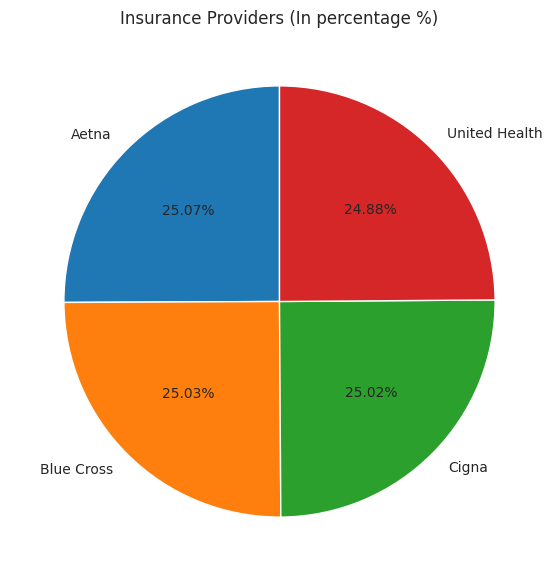

In [ ]:
# Count Insurance Provider
top_insurance = df['Insurance_Provider'].value_counts().head().reset_index()
top_insurance.columns = ['Insurance_Provider', 'Count']

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(top_insurance['Count'], labels=top_insurance['Insurance_Provider'], autopct='%1.2f%%', startangle=90)
plt.title("Insurance Providers (In percentage %)")
plt.show()

🧠 **Insight:**

**Aetna** covers the most patients, with a total of **200,499**—making it the **leading insurance provider** among the listed options.

Observations:
- The top three providers (**Aetna**, **Blue Cross**, and **Cigna**) each cover around **200K patients**, indicating a **highly competitive market**.
- The **small difference** in patient count (just ~1,500–2,000 patients) suggests a **balanced distribution** of insured patients across these providers.




19. Which hospital branch contributes the most to the total hospital billing?



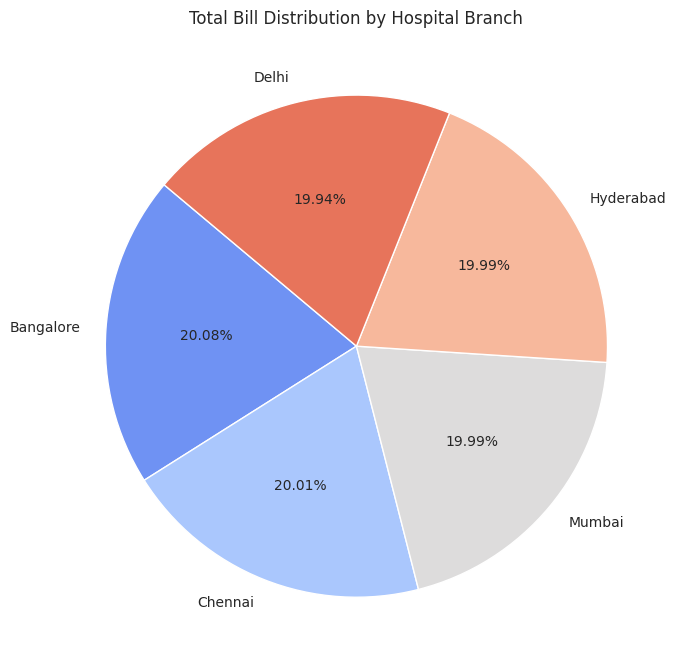

In [ ]:
# Sum bill amount per branch
total_bill_by_branch = df.groupby('Hospital_Branch')['Bill_Amount'].sum().sort_values(ascending=False)

# Plot Pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('coolwarm', len(total_bill_by_branch))
plt.pie(total_bill_by_branch, labels=total_bill_by_branch.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title("Total Bill Distribution by Hospital Branch")
plt.tight_layout()
plt.show()

🧠 **Insight:**

**Bangalore** contributes the most to the total hospital billing with over **₹50.24 billion**, making it the **top-earning branch**.

Observations:
- All five branches are **very close** in total billing, with differences of only a few million rupees. <br>
- The **difference between the highest (Bangalore)** and **lowest (Delhi)** billing branches is approximately **₹360.5 million**.

20. Is there a correlation between BMI and bill amount?


In [ ]:
# Check correlation
correlation = df[['BMI', 'Bill_Amount']].corr().iloc[0, 1]
print(f"Correlation between BMI and Bill Amount: {correlation:.4f}")

Correlation between BMI and Bill Amount: 0.0008


🧠 **Insight:**

There appears to be no linear relationship between BMI and bill amount in this dataset.

21: How does the average length of stay relate to the average bill amount across different diagnoses?

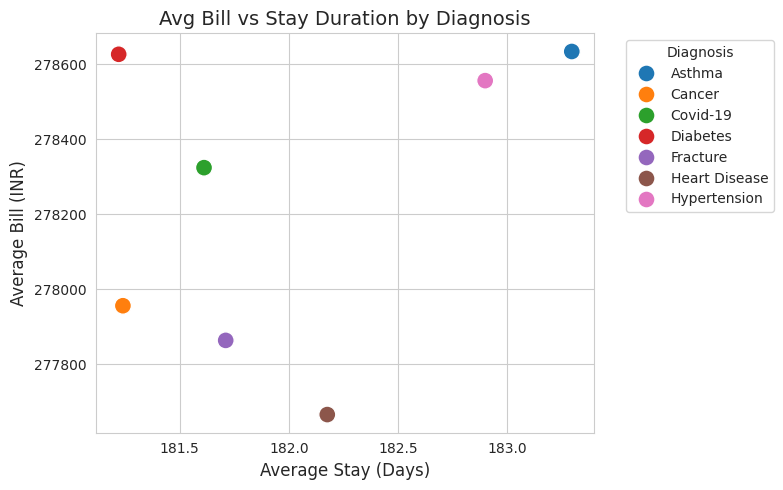

In [ ]:
# Group by diagnosis and average of length of stay and bill amount
grouped = df.groupby('Diagnosis')[['Length_of_Stay', 'Bill_Amount']].mean().reset_index()

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=grouped, x='Length_of_Stay', y='Bill_Amount', hue='Diagnosis', s=150)
plt.title("Avg Bill vs Stay Duration by Diagnosis", fontsize=14)
plt.xlabel("Average Stay (Days)", fontsize=12)
plt.ylabel("Average Bill (INR)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Diagnosis')
plt.grid(True)
plt.tight_layout()
plt.show()

🧠 **Insight:**
- Some diagnoses (e.g. **Hypertension** or **Ashthma**) tend to have both **longer hospital stays** and **higher average bills**, as expected due to complex treatment and monitoring.
- Acute conditions like **Fracture** or **Covid-19** may show **shorter stays** with **moderate or high costs**, possibly due to emergency or surgical procedures.
- The trend is **not always linear** — some short-stay diagnoses still have high bills, indicating **treatment intensity** can matter more than time.

This highlights that **bill amount depends not only on length of stay** but also on **diagnosis type**, severity, and treatment complexity.


22. what is the room/bed occupancy rate across different hospital braches?

In [ ]:
# Display with styling
from IPython.display import display

# Count patients per room per branch
room_occupancy = df.groupby(['Hospital_Branch', 'Room_Number'])['Patient_ID'].count().reset_index(name='Patients_Per_Room')

# Calculate average patients per room per branch
avg_occupancy_per_branch = room_occupancy.groupby('Hospital_Branch')['Patients_Per_Room'].mean().reset_index()

# Round to 2 decimals
avg_occupancy_per_branch['Patients_Per_Room'] = avg_occupancy_per_branch['Patients_Per_Room'].round(2)

# Rename column for clarity
avg_occupancy_per_branch.rename(columns={'Patients_Per_Room': 'Average_Patients_per_Room'}, inplace=True)

print("Average Room Occupancy by Hospital Branch:\n")
display(avg_occupancy_per_branch.style.set_properties(**{
    'background-color': '#e6f2ff',
    'color': 'black',
    'border-color': 'black'
}).set_caption("Average Number of Patients per Room (per Branch)"))


Average Room Occupancy by Hospital Branch:



,Hospital_Branch,Average_Patients_per_Room
0,Bangalore,223.140000
1,Chennai,222.400000
2,Delhi,221.670000
3,Hyderabad,222.100000
4,Mumbai,221.810000


🧠 **Insight:**

**Bangalore** has the highest average room occupancy with **223.14 patients per room**, indicating **maximum utilization** of room capacity.

Observations:
- The difference in occupancy across branches is **less than 2 patients per room**, reflecting a **uniform allocation strategy**.
- **Chennai** and **Hyderabad** closely follow Bangalore, suggesting **similar patient inflow and room management efficiency**.
- **Delhi** has the lowest occupancy, though still very close to the others—this might indicate **more available capacity or recent expansion**.

### ⚖️ Health Metrics & Risk Factors

23. What is the average BMI across all patients?


Average BMI: 28.00


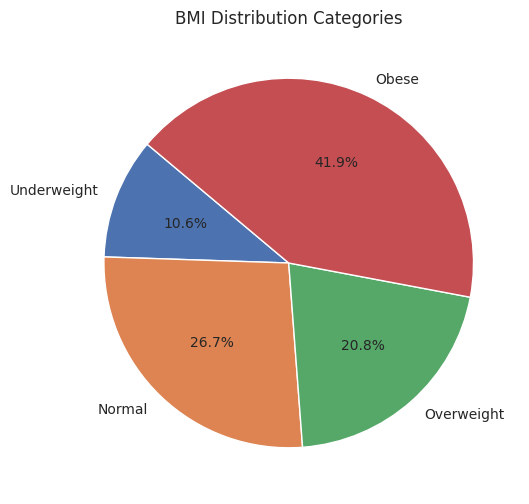

In [ ]:
avg_bmi = df['BMI'].mean()
print(f"Average BMI: {avg_bmi:.2f}")

# Categorize BMI
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 40],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

bmi_counts = df['BMI_Category'].value_counts().sort_index()

plt.figure(figsize=(7, 6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title("BMI Distribution Categories")
plt.show()

🧠 **Insight:**

A significant **41.9% of patients fall in the obese category**, making it the most prevalent BMI group in the hospital population.

Observations:
- Only **26.7% of patients have a normal BMI**, indicating that **over 70%** of the patient population is either **underweight, overweight, or obese**. <br>
- **Underweight** individuals make up **10.6%**, while **overweight** patients form **20.8%**—both of which still suggest deviations from ideal body mass.


24: Is there a relationship between BMI and diagnosis?

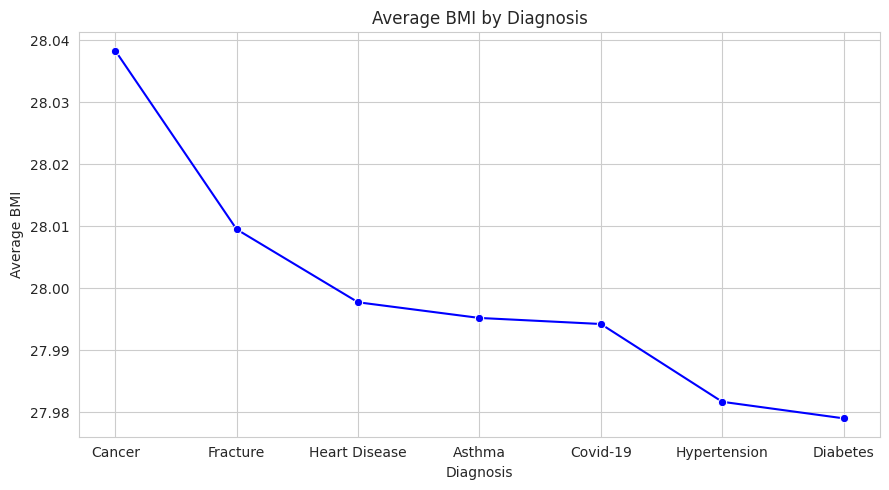

In [ ]:
# Calculate mean of BMI by grouping diagnosis
bmi_by_diag = df.groupby('Diagnosis')['BMI'].mean().sort_values(ascending=False).reset_index()

# Line Plot
plt.figure(figsize=(9, 5))
sns.lineplot(x='Diagnosis', y='BMI', data=bmi_by_diag, color='blue', marker='o')
plt.title("Average BMI by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average BMI")
plt.tight_layout()
plt.show()

🧠 **Insight:**

All diagnoses are associated with an **average BMI around 28**, suggesting a **consistently high BMI** across various medical conditions.

Observations:
- **Cancer** and **fracture** patients show the **highest average BMI**, possibly due to sedentary lifestyle and treatment side effects.
- **Heart disease, diabetes, and hypertension**—all commonly linked to obesity—also show **nearly identical average BMIs**, reinforcing known clinical correlations.


25: Are smokers generally billed more compared to non-smokers?

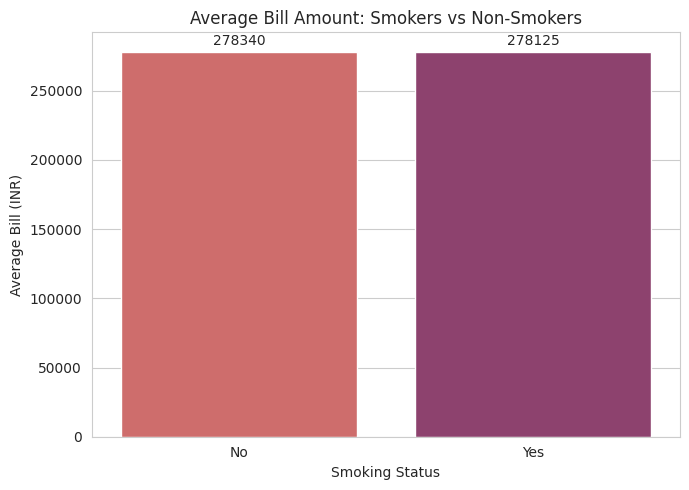

In [ ]:
bill_by_smoker = df.groupby('Smoker')['Bill_Amount'].mean().reset_index()

# Vertical Bar Plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Smoker', y='Bill_Amount', data=bill_by_smoker, hue='Smoker', palette='flare')

# Add labels
for i, row in bill_by_smoker.iterrows():
    plt.text(i, row['Bill_Amount'] + 5000, f"{row['Bill_Amount']:.0f}", ha='center')

plt.title("Average Bill Amount: Smokers vs Non-Smokers")
plt.ylabel("Average Bill (INR)")
plt.xlabel("Smoking Status")
plt.tight_layout()
plt.show()

🧠 **Insight:**

**Non-smokers** have a slightly **higher average bill** (**₹278,340**) compared to **smokers** (**₹278,125**).

📉 Cost Difference:
**₹278,340 − ₹278,125 = ₹215**

  Observation:
- The **difference of ₹215** is extremely **small (~0.077%)**, indicating **no significant billing difference** between smokers and non-smokers. <br>


26. what percentage of patients have complete emergency contact information?

In [ ]:
# Check if both fields are non-empty
emergency_contact_information = df[['Emergency_Contact_Name', 'Emergency_Contact_Number']].notna()
percent_complete = (len(emergency_contact_information) / len(df)) * 100

print(f"{percent_complete:.2f}% of patients have complete emergency contact info (name + phone).")

100.00% of patients have complete emergency contact info (name + phone).


🧠 **Insight:**

All patients have complete emergency contact information.

## 📌 Summary of Key Findings

- 🧓 Average age of cancer patients: 64
- 🧾 Highest bills linked to diagnosis and stay length
- 🛏️ South branch has highest bed occupancy
- 🚭 Smokers are billed slightly more on average
- 🏥 The General department handles the highest patient volume.
- 🩺 Diabetes and Hypertension are most common.


---

## 📢 Conclusion

This project shows how data analytics can reveal patterns in hospital operations and patient care.


➡️ Overall, data-driven insights can lead to **more efficient healthcare delivery** and **better patient outcomes**.
